<a href="https://colab.research.google.com/github/Juniorexz/MachineLearningProjects/blob/main/Teste20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
!pip install pandas

In [148]:
!pip install numpy

In [149]:
from sklearn.feature_selection import mutual_info_regression

In [150]:
!pip install -U scikit-learn

In [151]:
pip install -U scikit-learn

In [152]:
import sklearn
print(sklearn.__version__)

1.5.2


In [153]:
#Libs necessárias
import pandas as pd
import numpy as np
import csv


#Libs gráficas
import matplotlib.pyplot as plt
import seaborn as sns


#Avisos
import warnings
warnings.filterwarnings('ignore')


#Configuração no pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

#Configuração no Matplotlib
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

[texto do link](https://)#Exploração dos dados

In [154]:
#Lendo os dados
Base_Dados = pd.read_csv('house_data.csv')

#Dimensão
Base_Dados.shape

(10692, 13)

In [155]:
Base_Dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [156]:
#Removendo colunas
Base_Dados.drop( columns=['fire insurance (R$)', 'total (R$)'], inplace=True)

In [157]:
# Verificar
Base_Dados.shape

(10692, 11)

In [158]:
#Campos vazios
Base_Dados.isnull()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10687,False,False,False,False,False,False,False,False,False,False,False
10688,False,False,False,False,False,False,False,False,False,False,False
10689,False,False,False,False,False,False,False,False,False,False,False
10690,False,False,False,False,False,False,False,False,False,False,False


In [159]:
#Campos vazios ordenar do maior pro menor
Base_Dados.isnull().sum().sort_values(ascending=False)

,0
city,0
area,0
rooms,0
bathroom,0
parking spaces,0
floor,0
animal,0
furniture,0
hoa (R$),0
rent amount (R$),0


In [160]:
#Campos únicos
Base_Dados.nunique()

,0
city,5
area,517
rooms,11
bathroom,10
parking spaces,11
floor,35
animal,2
furniture,2
hoa (R$),1679
rent amount (R$),1195


In [161]:
#Tipos das colunas
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [162]:
#Tipo de colunas
Base_Dados.dtypes.value_counts()

,count
int64,7
object,4


# Exploração Analítica(EDA)

In [163]:
#Filtrar os tipos de colunas ,no caso inteiro e objetos
Colunas_Categoricas = Base_Dados.columns[Base_Dados.dtypes == object]
Colunas_Numericas = Base_Dados.columns[Base_Dados.dtypes != object]

Colunas_Categoricas, Colunas_Numericas

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

In [164]:
#Base_Dados.columns[Base_Dados.dtypes == object]

In [165]:
#Fotografia ** saber Retreinar pra saber se a base mudou muito e o motivo, tendo a data é mais fácil
# Dados --> 90% aceita animal | prox semestre 50% aceita imovel

In [166]:
#Análise dos campos objetos
Base_Dados['city'].value_counts()

,count
city,
São Paulo,5887
Rio de Janeiro,1501
Belo Horizonte,1258
Porto Alegre,1193
Campinas,853


In [167]:
#Análise dos campos objetos
Base_Dados['city'].value_counts(normalize=True)

,proportion
city,
São Paulo,0.550599
Rio de Janeiro,0.140385
Belo Horizonte,0.117658
Porto Alegre,0.111579
Campinas,0.079779


In [168]:
#Análise dos campos objetos
Base_Dados['city'].value_counts(normalize=True) * 100

,proportion
city,
São Paulo,55.059858
Rio de Janeiro,14.038533
Belo Horizonte,11.765806
Porto Alegre,11.157875
Campinas,7.977927


In [169]:
# Loop
for Coluna in Colunas_Categoricas:

  #Fazendo a analise
  Analise = Base_Dados[Coluna].value_counts(normalize=True) * 100
  #Impressão
  print(Coluna, '\n', Analise, '\n')


city 
 city
São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: proportion, dtype: float64 

floor 
 floor
-      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: proportion, dtype: float64 

animal 
 animal
acept        77.777778
not acept    22.222222
Name: proportion, dtype: float64 

furniture 
 furniture
not furnished    75.626637
furnished        24.373

In [170]:
#Correção dos dados

#Ajustando o andar
#Diferença de loc pra iloc = loc=localiza, iloc=faz o ajuste determinado
Base_Dados.loc[Base_Dados['floor'] == '301']
Base_Dados.iloc[2562, 5] = 30

#Ajustar 0 '-'
Base_Dados['floor'].apply( lambda Registro : 0 if Registro == '-' else Registro)

,floor
0,7
1,20
2,6
3,2
4,1
...,...
10687,5
10688,17
10689,8
10690,8


In [171]:
Base_Dados.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279
10691,São Paulo,80,2,1,0,-,acept,not furnished,0,1400,165


In [172]:
#Correção dos dados

#Ajustando o andar
#Diferença de loc pra iloc = loc=localiza, iloc=faz o ajuste determinado
Base_Dados.loc[Base_Dados['floor'] == '301']
Base_Dados.iloc[2562, 5] = 30

#Ajustar 0 '-'
Base_Dados['floor'] = Base_Dados['floor'].apply( lambda Registro : 0 if Registro == '-' else Registro )
Base_Dados['floor'] = pd.to_numeric(Base_Dados['floor'])

#Verificar
Base_Dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [173]:
Base_Dados.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165


In [174]:
Base_Dados.dtypes

,0
city,object
area,int64
rooms,int64
bathroom,int64
parking spaces,int64
floor,int64
animal,object
furniture,object
hoa (R$),int64
rent amount (R$),int64


In [175]:
pd.to_numeric(Base_Dados['floor'])

,floor
0,7
1,20
2,6
3,2
4,1
...,...
10687,5
10688,17
10689,8
10690,8


In [176]:
Base_Dados['floor'].value_counts (normalize = True )

,proportion
floor,
0,0.230172
1,0.101104
2,0.092125
3,0.087074
4,0.069959
5,0.056117
6,0.050412
7,0.046483
8,0.045829


In [177]:
len(Colunas_Numericas)

7

O Box Plot, também chamado diagrama de caixa, é uma ferramenta gráfica utilizada para ilustrar um conjunto de dados. Por meio dele, é possível visualizar a distribuição de dados com base em cinco estatísticas: mínimo,primeiro quartil(Q1,mediana,terceiro quarti(Q3),máximo).Esses valores também são conhecidos como resumo dos cinco números.Ele também pode informar os valores discrepantes (outliers) dos dados, oferecendo uma medida complementar para o desenvolvimento de perspectivas sobre as informações passadas através dos dados. Além disso, o Box Plot pode informar a posição dos dados, sua simetria, dispersão, cumprimento da cauda de distribuição e se estão ou não distorcidos.No gráfico do Box Plot, a haste vertical é interpretada de baixo para cima, sendo que a parte inferior indica o mínimo e a superior indica o máximo, sempre desconsiderando possíveis outliers.O retângulo central da haste possui três linhas que estão na horizontal: a linha de baixo, representada pelo contorno externo inferior do retângulo, indica o primeiro quartil. A linha de cima, que é o contorno externo superior do retângulo, indica o terceiro quartil. Já a linha interna indica a mediana ou o chamado segundo quartil.
Valores discrepantes, outliers e extremos são representados por asteriscos ou pontos, e indicam pontos atípicos no gráfico.
Box Plot: para que são usados?
Os diagramas criados pelo Box plot possibilitam diversos tipos de observações e análises. Isso porque eles oferecem diferentes nuances, já que os outliers permitem enxergar os dados de outra perspectiva, influenciando assim na tomada de decisão.
Para isso, é fundamental que cada um dos dados apresentados no resumo de 5 números seja considerado e analisado de forma correta, a fim de evitar interpretações erradas.O diagrama de caixa também é muito usado para apresentação estatística e cálculos fundamentados em dados, tornando-se assim uma ferramenta gráfica para representar a variação de dados existentes em uma variável numérica, representada por meio dos quartis.
Normalmente, os gráficos tipo Box plot são úteis em três cenários:
Cenário 1: visualizar a distribuição de valores em conjuntos de dados
Um gráfico tipo Box plot permite visualizar rapidamente a distribuição de valores em um conjunto de dados e ver onde estão localizadas as cinco estatísticas de resumo numéricos.
Cenário 2: comparar duas ou mais distribuições
Com o Box plot é possível fazer comparações e visualizar as diferenças entre duas ou mais distribuições de dados, analisando os valores medianos e a dispersão entre cada um dos resultados apresentados nesses dados.
Cenário 3: Para identificar outliers
Nos gráficos Box Plot, os valores atípicos são normalmente representados por pequenos círculos que se estendem acima ou abaixo do retângulo que representa os quartis e a mediana.
Uma observação é menor que Q1-1,5*(intervalo de quartil) e maior do que Q3+1,5*(intervalo de quartil)  definida como um outlier se atender a um dos seguintes critérios:
Ao criar um gráfico tipo Box Plot, é possível ver rapidamente se uma distribuição de dados tem ou não valores discrepantes.
O MATLAB é a ferramenta capaz de facilitar a produção de gráficos do tipo Box Plot que a OPENCADD oferece aos clientes. Para se plotar um gráfico tão robusto como este, basta simplesmente usar o comando boxplot. Isso porque o software possui uma linguagem de fácil entendimento e uma plataforma intuitiva e flexível, que podem ser usados para resolver quaisquer tipos de problemas e desenvolver projetos de todos os níveis.
Ao criar um diagrama de caixa no MATLAB, você tem a possibilidade de configurar da maneira que preferir. O MATLAB permite que você altere as cores e o tamanho do contorno da caixa, o estilo da mediana, o tamanho do gráfico, o estilo do gráfico, o status do entalhe, entre outras possibilidades.

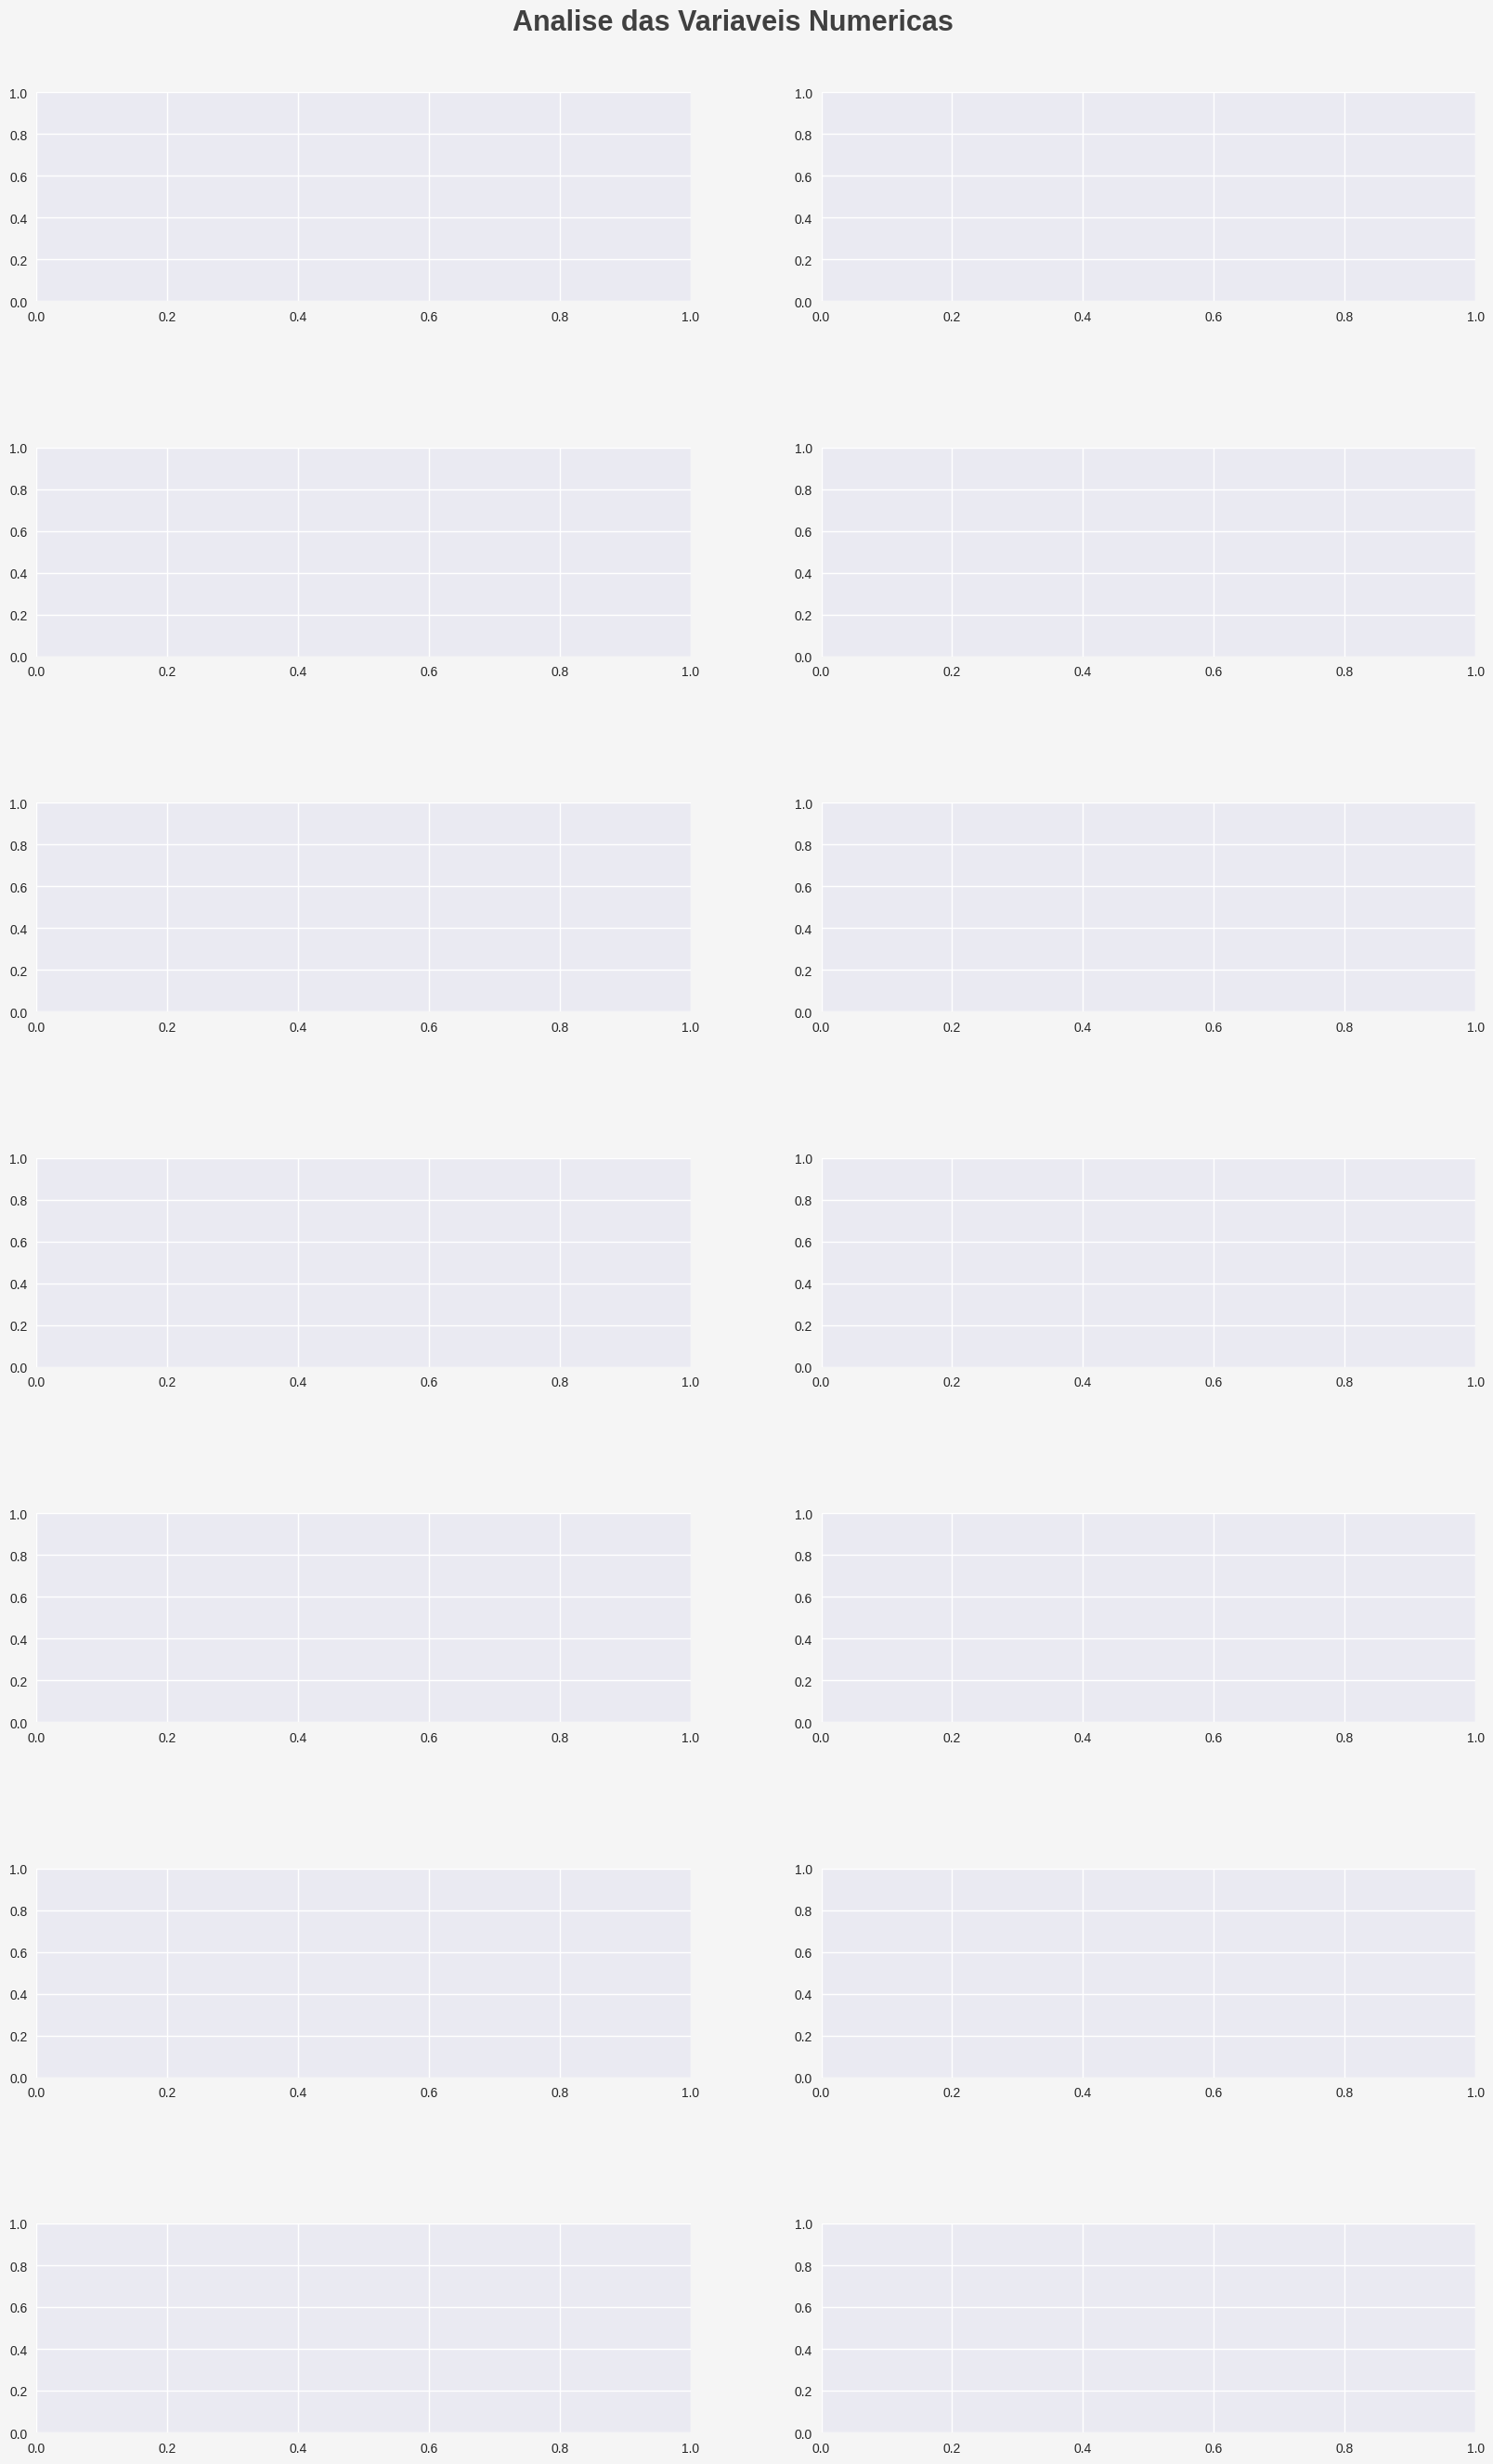

In [110]:
#Grid - Graficos
#Tamanho
Figura, Eixo = plt.subplots(figsize=(20, 30) )

#Cor de fundo
Cor_Fundo = '#f5f5f5'
Figura.set_facecolor( Cor_Fundo )

#Paleta de Cores
sns.color_palette('flare', len(Colunas_Numericas) * 2)

#Titulo
plt.suptitle('Analise das Variaveis Numericas', fontsize=22, color='#404040', fontweight=600 )

#Estrutura
Linhas = 7 #(Todas as infos numericas)
Colunas = 2 #( Boxplot - Displot)
Posicao = 1 #Posicao inicial do grid

#Loop para plotar os gráficos
for Coluna in Colunas_Numericas:

#Plot no Grid -- Boxplot
  plt.subplot(Linhas, Colunas, Posicao)

# Mudar
  Posicao += 1

#Plot no Grid -- Displot
  plt.subplot(Linhas, Colunas, Posicao)

# Mudar
  Posicao += 1

# Ajuste de Grid
plt.subplots_adjust( top=0.95, hspace=0.7)



#sns.boxplot (data=Base_Dados, y='area')

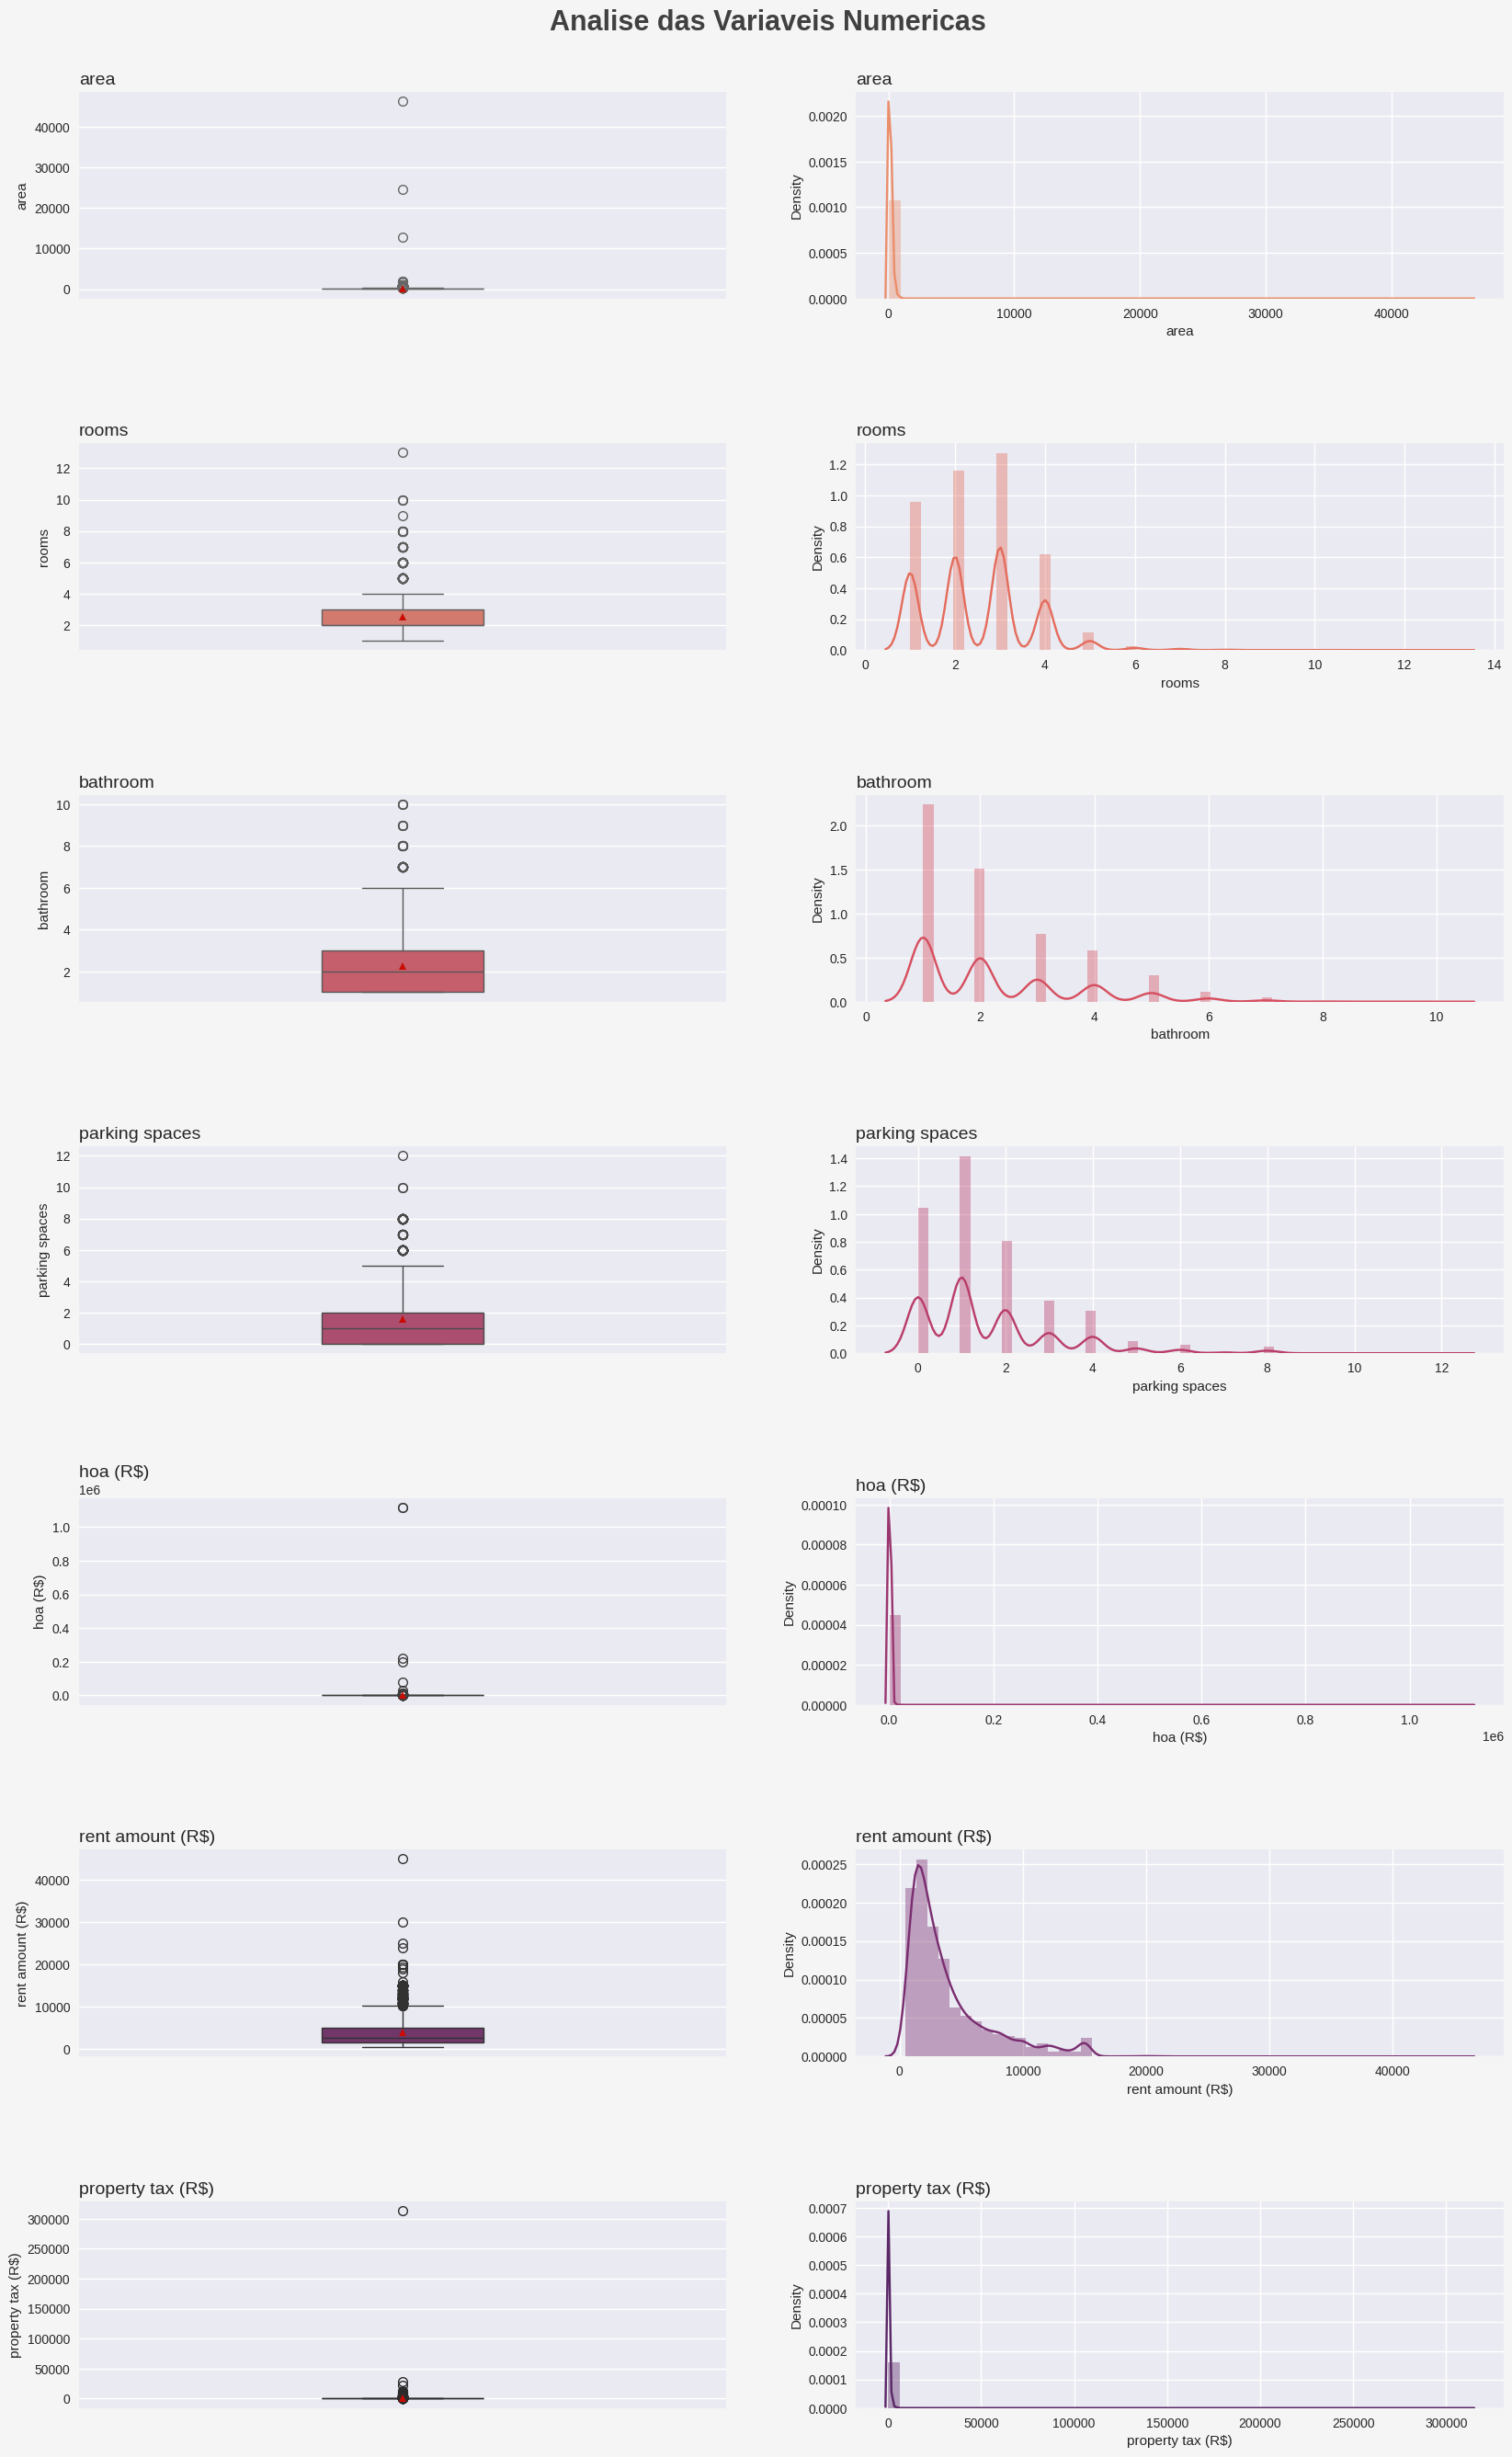

In [111]:
#Grid - Graficos
#Tamanho
Figura, Eixo = plt.subplots(figsize=(20, 30) )

#Cor de fundo
Cor_Fundo = '#f5f5f5'
Figura.set_facecolor( Cor_Fundo )

#Paleta de Cores
Paleta_Cores = sns.color_palette('flare', len(Colunas_Numericas) * 2)

#Titulo
plt.suptitle('Analise das Variaveis Numericas', fontsize=22, color='#404040', fontweight=600 )

#Estrutura
Linhas = 7 #(Todas as infos numericas)
Colunas = 2 #( Boxplot - Displot)
Posicao = 1 #Posicao inicial do grid

#Loop para plotar os gráficos
for Coluna in Colunas_Numericas:

# Plot no Grid -- Boxplot
  plt.subplot(Linhas, Colunas, Posicao)

# Titulo
  plt.title(f'{Coluna}', loc='left',fontsize=14, fontweight=200)

# Plot
  sns.boxplot( data=Base_Dados, y=Coluna, showmeans=True,saturation=0.75,
              linewidth=1, color=Paleta_Cores[Posicao], width=0.25 )

# Mudar
  Posicao += 1

#Plot no Grid -- Displot
  plt.subplot(Linhas, Colunas, Posicao)

# Titulo
  plt.title(f'{Coluna}', loc='left',fontsize=14, fontweight=200)

# Plot
  sns.distplot(Base_Dados[Coluna], color=Paleta_Cores[Posicao -1] )

# Mudar
  Posicao += 1

# Ajuste de Grid
plt.subplots_adjust( top=0.95, hspace=0.7)



#sns.boxplot (data=Base_Dados, y='area')

Engenharia de Features

In [112]:
Base_Dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [113]:
Base_Dados.loc[ Base_Dados['area'] <= 10000]['area'].describe()

,area
count,10689.000000
mean,141.431846
std,134.348219
min,11.000000
25%,56.000000
50%,90.000000
75%,182.000000
max,2000.000000


In [114]:
Base_Dados['hoa (R$)'].describe()

,hoa (R$)
count,1.069200e+04
mean,1.174022e+03
std,1.559231e+04
min,0.000000e+00
25%,1.700000e+02
50%,5.600000e+02
75%,1.237500e+03
max,1.117000e+06


In [115]:
Base_Dados['hoa (R$)'].max()

1117000

In [116]:
Base_Dados.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165


In [117]:
Base_Dados.loc[ Base_Dados['hoa (R$)']<= 10000]['hoa (R$)'].describe()

,hoa (R$)
count,10683.000000
mean,911.949827
std,1104.885520
min,0.000000
25%,170.000000
50%,558.000000
75%,1230.000000
max,10000.000000


In [118]:
Base_Dados['hoa (R$)'].sort_values(ascending=False).head(20)

,hoa (R$)
255,1117000
6979,1117000
6230,220000
2859,200000
2928,81150
1444,32000
1213,15000
415,14130
5293,14000
8858,10000


In [119]:
Base_Dados.iloc [255]

,255
city,Belo Horizonte
area,155
rooms,1
bathroom,4
parking spaces,0
floor,4
animal,not acept
furniture,not furnished
hoa (R$),1117000
rent amount (R$),2790


In [120]:
Base_Dados.iloc [547]

,547
city,São Paulo
area,580
rooms,5
bathroom,5
parking spaces,4
floor,4
animal,acept
furniture,not furnished
hoa (R$),9900
rent amount (R$),15000


In [121]:
Base_Dados.iloc [6230]

,6230
city,São Paulo
area,340
rooms,5
bathroom,4
parking spaces,2
floor,7
animal,acept
furniture,not furnished
hoa (R$),220000
rent amount (R$),12000


In [122]:
Base_Dados['rent amount (R$)'].value_counts( ascending=False)

,count
rent amount (R$),
2500,258
2000,244
1200,237
3000,235
15000,231
...,...
874,1
1283,1
765,1


In [123]:
Base_Dados['rent amount (R$)'].describe()

,rent amount (R$)
count,10692.000000
mean,3896.247194
std,3408.545518
min,450.000000
25%,1530.000000
50%,2661.000000
75%,5000.000000
max,45000.000000


In [124]:
Base_Dados.loc[ Base_Dados['rent amount (R$)'] <= 100000 ]['rent amount (R$)'].describe()

,rent amount (R$)
count,10692.000000
mean,3896.247194
std,3408.545518
min,450.000000
25%,1530.000000
50%,2661.000000
75%,5000.000000
max,45000.000000


In [125]:
Base_Dados.loc[ Base_Dados['rent amount (R$)'] <= 40000 ]['rent amount (R$)'].describe()

,rent amount (R$)
count,10691.000000
mean,3892.402488
std,3385.440586
min,450.000000
25%,1530.000000
50%,2660.000000
75%,5000.000000
max,30000.000000


In [126]:
Base_Dados.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)'],
      dtype='object')

In [127]:
Base_Dados['property tax (R$)'].sort_values ( ascending=False ).head(20)

,property tax (R$)
6645,313700
6243,28120
1699,21880
10172,12500
5331,10830
2928,9900
7674,9500
19,9500
8187,8750
2182,8750


In [128]:
Base_Dados.iloc[6645]

,6645
city,São Paulo
area,42
rooms,1
bathroom,2
parking spaces,1
floor,6
animal,not acept
furniture,not furnished
hoa (R$),690
rent amount (R$),2500


Engenharia de Features

In [129]:
# Ajuste de colunas categoricas,o comando permite a conversão 0 ou 1 aqui no caso irei converter pra dizer se aceita animais ou não
Base_Dados['animal'].map({'acept':1, 'not acept':0})

,animal
0,1
1,1
2,1
3,1
4,0
...,...
10687,0
10688,1
10689,0
10690,1


In [130]:
# Ajuste de colunas categoricas,o comando permite a conversão 0 ou 1 aqui no caso irei converter pra dizer se aceita animais ou não
Base_Dados['animal']= Base_Dados['animal'].map({'acept':1, 'not acept':0})
#Base_Dados['furniture'].map({'furnished':1, 'not furnished':0})
Base_Dados['furniture']= Base_Dados['furniture'].map({'furnished':1, 'not furnished':0})


#Filtrar a cidade de São Paulo
Filtros_SP = Base_Dados.loc

#MVP = Valor para o Cliente

In [131]:
Base_Dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22
4,São Paulo,25,1,1,0,1,0,0,0,800,25


In [132]:
# Ajuste de colunas categoricas,o comando permite a conversão 0 ou 1 aqui no caso irei converter pra dizer se aceita animais ou não
Base_Dados['animal']= Base_Dados['animal'].map({'acept':1, 'not acept':0})
Base_Dados['furniture'] = Base_Dados['furniture'].map( {'furnished':1, 'not furnished':0})

#Filtrar a cidade de São Paulo
Filtros_SP = Base_Dados.loc[ Base_Dados['city'] == 'São Paulo']

#MVP = Valor para o Cliente

# Verificar
Filtros_SP.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,NaN,NaN,2065,3300,211
1,São Paulo,320,4,4,0,20,NaN,NaN,1200,4960,1750
4,São Paulo,25,1,1,0,1,NaN,NaN,0,800,25
5,São Paulo,376,3,3,7,0,NaN,NaN,0,8000,834
7,São Paulo,213,4,4,4,4,NaN,NaN,2254,3223,1735


In [133]:
#Retirando a Coluna Cidade
Filtros_SP.drop( columns=['city'], inplace=True )

In [134]:
#Separar os dados
Caracteristicas = Filtros_SP.drop( columns=['rent amount (R$)'])
Previsor = Filtros_SP['rent amount (R$)']

#Verificar
Caracteristicas.shape, Previsor.shape

((5887, 9), (5887,))

In [135]:
#Caracteristicass
Caracteristicas.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
0,70,2,1,1,7,NaN,NaN,2065,211
1,320,4,4,0,20,NaN,NaN,1200,1750
4,25,1,1,0,1,NaN,NaN,0,25
5,376,3,3,7,0,NaN,NaN,0,834
7,213,4,4,4,4,NaN,NaN,2254,1735


In [136]:
Previsor.head()

,rent amount (R$)
0,3300
1,4960
4,800
5,8000
7,3223


In [137]:
# Correlação
Filtros_SP.corr()

# Próximo de 1 - Correlação Positiva [Ambas Sobem]
# Próximo de -1 Correlação Negativa [Uma sobe e outra desce]

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
area,1.000000,0.306863,0.316543,0.300795,-0.038790,NaN,NaN,0.056091,0.274749,0.065289
rooms,0.306863,1.000000,0.759432,0.645041,-0.092117,NaN,NaN,0.136343,0.537622,0.071702
bathroom,0.316543,0.759432,1.000000,0.703530,-0.015503,NaN,NaN,0.163205,0.638924,0.101616
parking spaces,0.300795,0.645041,0.703530,1.000000,-0.038378,NaN,NaN,0.115951,0.573373,0.092362
floor,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,NaN,NaN,0.107211,0.065294,0.005672
animal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
furniture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hoa (R$),0.056091,0.136343,0.163205,0.115951,0.107211,NaN,NaN,1.000000,0.188147,0.028872
rent amount (R$),0.274749,0.537622,0.638924,0.573373,0.065294,NaN,NaN,0.188147,1.000000,0.091749
property tax (R$),0.065289,0.071702,0.101616,0.092362,0.005672,NaN,NaN,0.028872,0.091749,1.000000


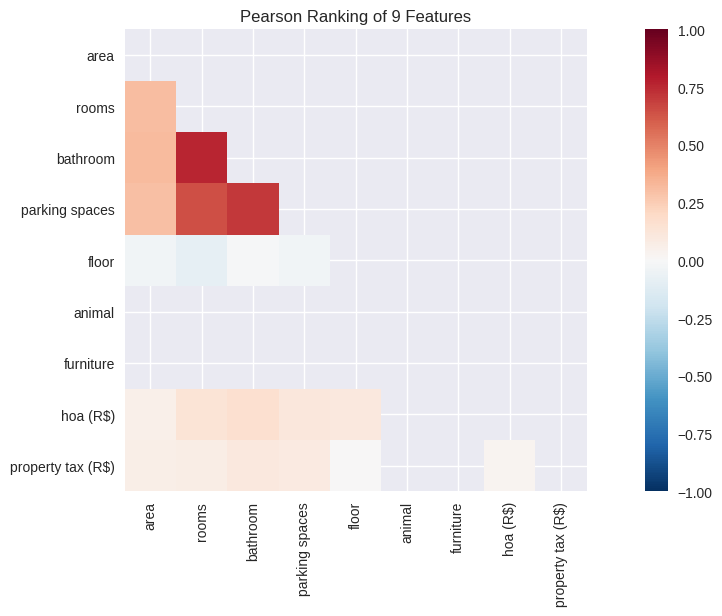

In [138]:
# Yellobrick
from yellowbrick.features import Rank2D

#Definir o metodo
Correlacao = Rank2D( algoritmo='person')

#Filtrar função
Correlacao.fit (Caracteristicas, Previsor)
Correlacao.transform (Caracteristicas)
Correlacao.show();

In [139]:
# Separar os dados
from sklearn.model_selection import train_test_split

#Divisão dos dados
x_treino, x_teste, y_treino, y_teste = train_test_split(
    Caracteristicas, Previsor, test_size=0.2, random_state=10
)

print(f'Dados de Treino: { x_treino.shape[0] }')
print(f'Dados de Teste: { x_teste.shape[0] }')

Dados de Treino: 4709
Dados de Teste: 1178


area: 0.5105658018599399
rooms: 0.2538211250782245
bathroom: 0.33492825400252224
parking spaces: 0.2877919199745249
floor: 0.08528284763601457
animal: 0.39381163271940656
furniture: 0.43126899409842245


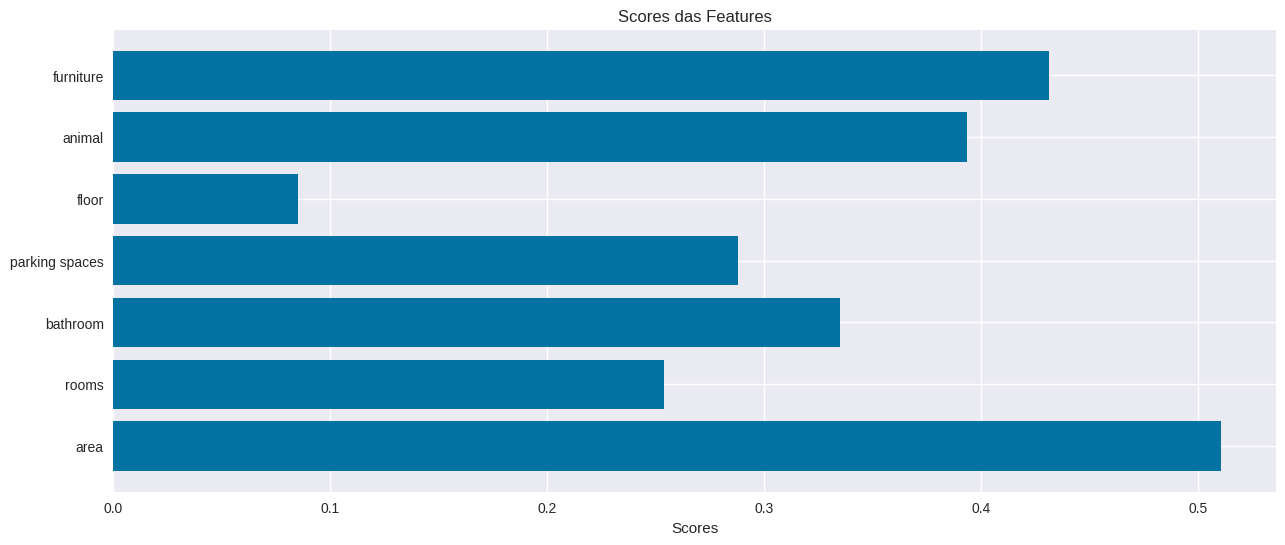

In [140]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt

def Selecao_Features(x_treino, y_treino, k='all'):

    # Imputação dos NaNs
    imputer = SimpleImputer(strategy='mean')  # ou 'median', 'most_frequent', etc.
    x_treino = imputer.fit_transform(x_treino)

    # Seleção das features
    selecao = SelectKBest(score_func=mutual_info_regression, k=k)
    selecao.fit(x_treino, y_treino)
    return selecao

# Aplicar função
Scores = Selecao_Features(x_treino, y_treino)

# Analisar e visualizar os resultados
feature_scores = {x_treino.columns[i]: score for i, score in enumerate(Scores.scores_)}
for feature, score in feature_scores.items():
    print(f'{feature}: {score}')

# Gráfico de barras
plt.barh(list(feature_scores.keys()), list(feature_scores.values()))
plt.xlabel('Scores')
plt.title('Scores das Features')
plt.show()


Construção do modelo

In [141]:
# Modelo Random Forest Regression
#Árvores de decisão e pondera qual o melhor resultado
from sklearn.ensemble import RandomForestRegressor

# Instanciar
Modelo_Floresta = RandomForestRegressor(max_depth=5)

# Fitar
Modelo_Floresta.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=5)

In [142]:
#Avaliar a performance
Previsoes = Modelo_Floresta.predict(x_teste)

Previsoes[0:5]

array([1507.81106967, 9216.41672181, 7900.80398399, 4467.72823195,
       3475.31587444])

In [143]:
x_teste.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
9659,25,1,1,0,0,NaN,NaN,0,84
4671,480,4,5,3,0,NaN,NaN,0,742
7122,226,3,4,3,6,NaN,NaN,2200,1209
4221,100,2,4,2,12,NaN,NaN,885,330
8920,35,1,1,1,14,NaN,NaN,1700,275


In [144]:
y_treino.head()

,rent amount (R$)
7212,12000
2211,885
4147,3076
2644,4600
3375,4000


In [145]:
#Função para avaliar
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

#r2_score = Calcula o quanto o modelo se explica de 0 a 1

#Avaliando o modelo
print(f'RNSE: sqrt {mean_squared_error(y_teste, Previsoes, squared=False)}')
print(f'Score: {r2_score(y_teste, Previsoes)}')
#RNSE é o erro do modelo e score é o quanto ele se explica

RNSE: sqrt 2483.6024720952946
Score: 0.553567457186279


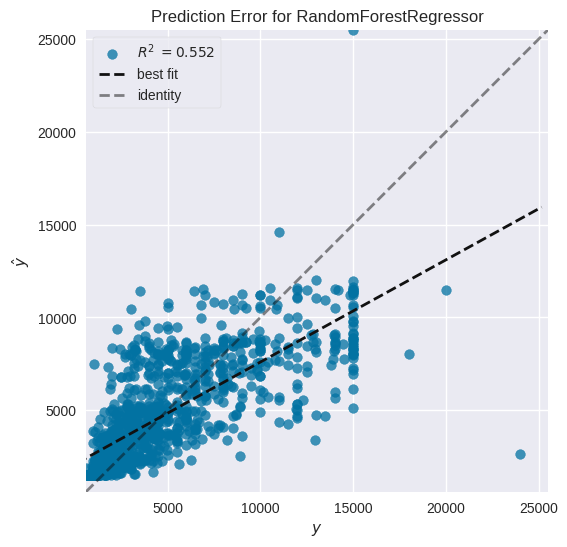

In [146]:
#Avaliando Yellowbrick
from yellowbrick.regressor import PredictionError

#Instanciar
Modelo = RandomForestRegressor(max_depth=5)
Erro_Modelo = PredictionError(Modelo)

#Fitar
Erro_Modelo.fit(x_treino, y_treino)
Erro_Modelo.score(x_teste, y_teste)
Erro_Modelo.show();

#Fitar
Erro_Modelo.fit(x_treino, y_treino)
Erro_Modelo.score(x_teste, y_teste)
Erro_Modelo.show();

Exportação


In [178]:
#Exportando o modelo
import joblib

#Função
joblib.dump(Modelo_Floresta, 'Modelo_Floresta_Aleatorio_v001.pkl')

['Modelo_Floresta_Aleatorio_v001.pkl']

In [179]:
# Testando o modelo treiando
Funcao_Modelo_Carregado = joblib.load('Modelo_Floresta_Aleatorio_v001.pkl')


In [180]:
Funcao_Modelo_Carregado

x_teste.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
9659,25,1,1,0,0,NaN,NaN,0,84
4671,480,4,5,3,0,NaN,NaN,0,742
7122,226,3,4,3,6,NaN,NaN,2200,1209
4221,100,2,4,2,12,NaN,NaN,885,330
8920,35,1,1,1,14,NaN,NaN,1700,275


In [181]:
Funcao_Modelo_Carregado

x_teste.head(1)

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
9659,25,1,1,0,0,NaN,NaN,0,84


In [183]:
Funcao_Modelo_Carregado

x_teste.head(1).values

array([[25.,  1.,  1.,  0.,  0., nan, nan,  0., 84.]])

In [184]:
#Testando
Funcao_Modelo_Carregado.predict(x_teste.head(1).values)

array([1507.81106967])